In [1]:
import pandas as pd
from src.constants import DEFAULT_ACTIVITY_KEY, ANNOTATION_KEY, EVENT_LOG_NAME_KEY, FILEPATH_FEATURES, FILE_ACTIVITY_ROLE_ANNOTATIONS
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Import and Preprocess Dataset

In [2]:
df = pd.read_csv(os.path.join(FILEPATH_FEATURES, 'all.csv'), low_memory=False)
df_gold = pd.read_csv(FILE_ACTIVITY_ROLE_ANNOTATIONS, low_memory=False)

In [3]:
df_svm = pd.read_csv('../../outputs/results/predictions/svc.csv')

In [4]:
df_svm

,concept:name,annotation,pred
0,A_Accepted,decide,decide
1,A_Cancelled,decide,decide
2,A_Complete,transform,transform
3,A_Concept,manage,transform
4,A_Create Application,create,create
...,...,...,...
620,Release B,transform,transform
621,Release C,transform,transform
622,Release D,transform,transform
623,Release E,transform,transform


In [5]:
print('Number of event classes: {0}'.format(df.shape[0]))
final_features = df.columns.drop(['event:log:name', DEFAULT_ACTIVITY_KEY])
print('Number of features: {0}'.format(len(final_features)))

Number of event classes: 625
Number of features: 195


# Create Figures

In [6]:
replacer = {
    'BPI Challenge 2017': 'BPI17',
    'BPI Challenge 2018': 'BPI18',
    'BPIC15_1': 'BPI15',
    'BPI_Challenge_2012': 'BPI12',
    'BPI_Challenge_2013_closed_problems': 'BPI13',
    'BPI_Challenge_2019': 'BPI19',
    'CCC19 - Log CSV': 'CCC19',
    'CreditRequirement': 'CR',
    'Detail_Incident_Activity': 'BPI14',
    'Hospital Billing - Event Log': 'HB',
    'PermitLog': 'BPI20',
    'Receipt phase of an environmental permit application process (‘WABO’), CoSeLoG project': 'WABO',
    'Road_Traffic_Fine_Management_Process': 'RTFM',
    'Sepsis Cases - Event Log': 'SC',
}

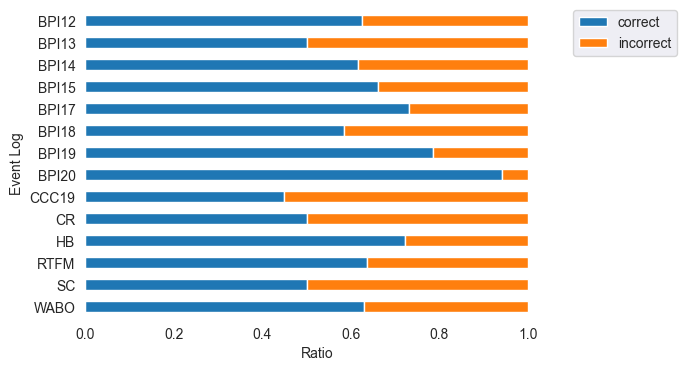

In [7]:
df_svm['correct'] = 0
df_svm['incorrect'] = 0
df_svm['total'] = 1
df_svm.loc[df_svm['annotation'] == df_svm['pred'], 'correct'] = 1
df_svm.loc[df_svm['annotation'] != df_svm['pred'], 'incorrect'] = 1
df_svm['log'] = df['event:log:name']
df_svm['log'] = df_svm['log'].apply(lambda x: replacer[x])
a = df_svm.groupby('log').sum()
a['correct'] = a['correct'] / a['total']
a['incorrect'] = a['incorrect'] / a['total']
a = a[['correct', 'incorrect']]
ax_ratio = a.sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=(6, 4), grid=False)

ax_ratio.set(xlabel='Ratio', ylabel='Event Log')
ax_ratio.set_facecolor('white')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

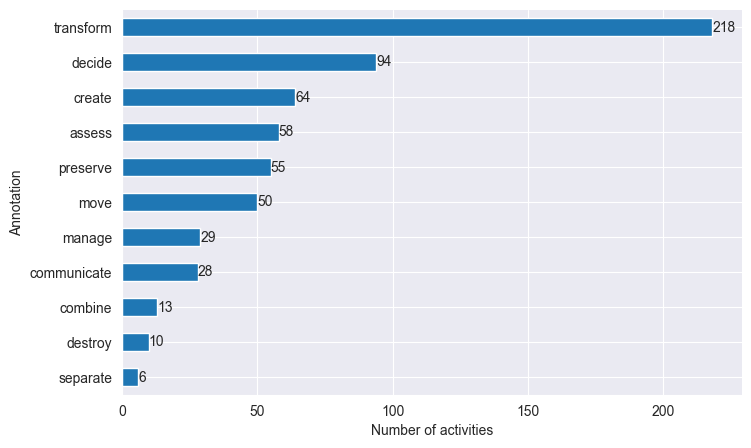

In [8]:
df_grouped = df_gold.rename(columns={ANNOTATION_KEY: 'Annotation'}).groupby(['Annotation'])[DEFAULT_ACTIVITY_KEY].count().sort_values()
ax_grouped = df_grouped.plot(kind='barh', title='', figsize=(8, 5))
ax_grouped.set(xlabel='Number of activities')

for c in ax_grouped.containers:
    # set the bar label
    ax_grouped.bar_label(c, fmt='%.0f', label_type='edge')

ax_grouped.spines['right'].set_visible(False)
ax_grouped.spines['top'].set_visible(False)

plt.show()

C:\Users\annal\AppData\Local\Temp\ipykernel_2432\2231072634.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_gold.set_xticklabels(pd.Series(df_gold[EVENT_LOG_NAME_KEY].unique()).sort_values(), rotation=0)


[Text(0.5, 0, 'Number of activities')]

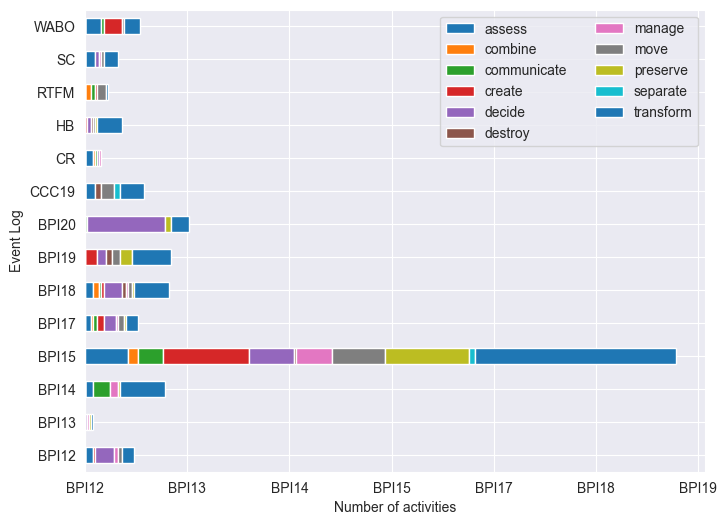

In [9]:
df_gold[EVENT_LOG_NAME_KEY] = df_gold[EVENT_LOG_NAME_KEY].apply(lambda x: replacer[x])
ax_gold = df_gold.rename(columns={ANNOTATION_KEY: 'Annotation', EVENT_LOG_NAME_KEY: 'Event Log'}).groupby(['Event Log', 'Annotation']).size().unstack().sort_index(ascending=True).plot(kind='barh', stacked=True, figsize=(8, 6))

ax_gold.legend(ncol=2)
ax_gold.set_xticklabels(pd.Series(df_gold[EVENT_LOG_NAME_KEY].unique()).sort_values(), rotation=0)
ax_gold.set(xlabel='Number of activities')